In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [199]:
print(df.isnull().any())

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
Income Cluster            False
dtype: bool


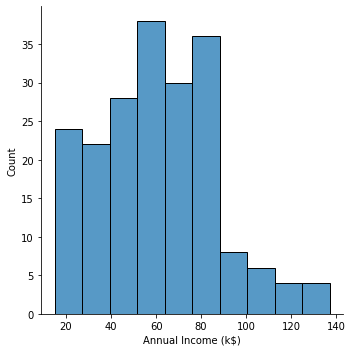

In [38]:
sns.displot(df['Annual Income (k$)'])

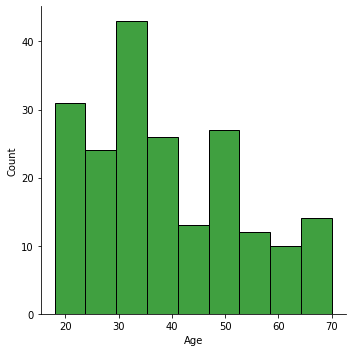

In [42]:
sns.displot(df['Age'], color='green')

<AxesSubplot:title={'center':'Female vs Male'}, ylabel='Gender'>

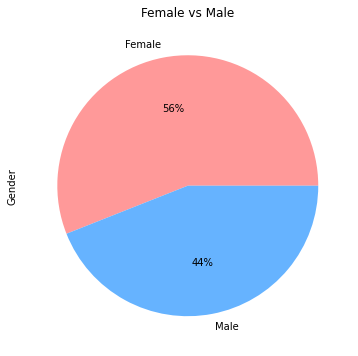

In [87]:
# Female vs Male percentage

genderpercent = df.groupby('Gender')['CustomerID'].count()
colors = ['#ff9999','#66b3ff']
genderpercent.plot.pie(label=('Gender'), title = "Female vs Male", colors = colors, autopct='%1.0f%%', figsize=(6,6)) 

Text(0.5, 1.0, 'Annual Income Female vs Male')

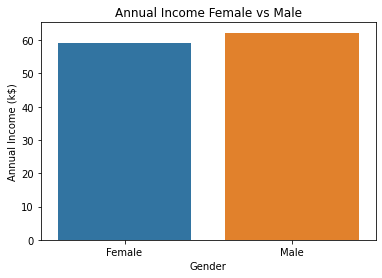

In [128]:
# https://www.geeksforgeeks.org/plot-the-size-of-each-group-in-a-groupby-object-in-pandas/
gendervsincome = df.groupby('Gender')['Annual Income (k$)'].mean()
sns.barplot(x = gendervsincome.index, y = gendervsincome.values)
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)') 
plt.title('Annual Income Female vs Male')

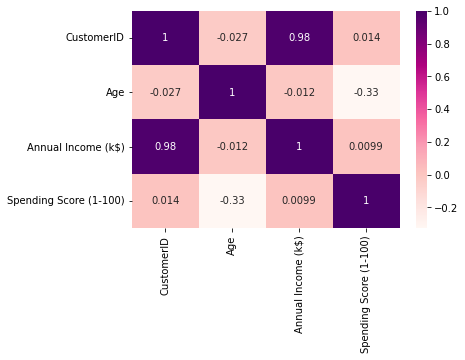

In [67]:
dataplot = sns.heatmap(df.corr(), cmap="RdPu", annot=True)

Text(0.5, 1.0, 'Distribution of Annual Income by Age')

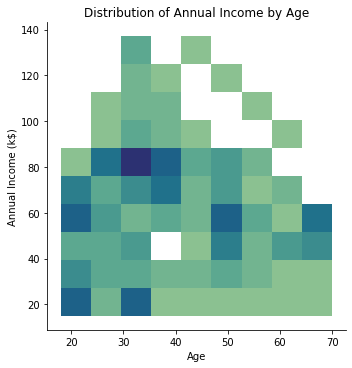

In [173]:
# Distribution of Annual Income by Age
sns.displot(data= df ,y='Annual Income (k$)',x='Age', cmap='crest')
plt.title('Distribution of Annual Income by Age')

Text(0.5, 1.0, 'Annual Income vs Spending Score')

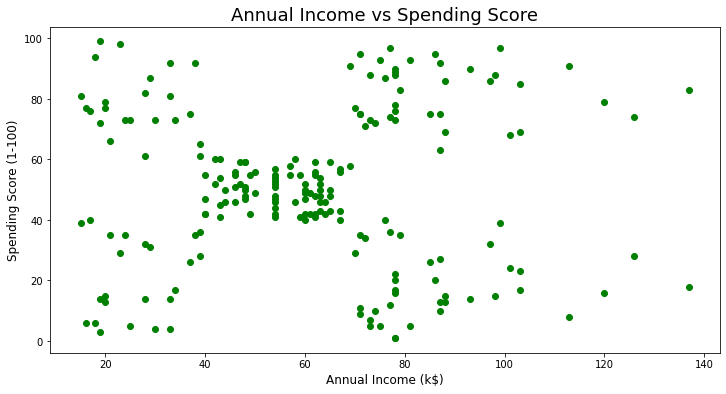

In [165]:
# Correlation between annual income & spending score

plt.figure(figsize=(12, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='g')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Annual Income vs Spending Score', fontsize=18)

Text(0.5, 1.0, 'Age vs Spending Score')

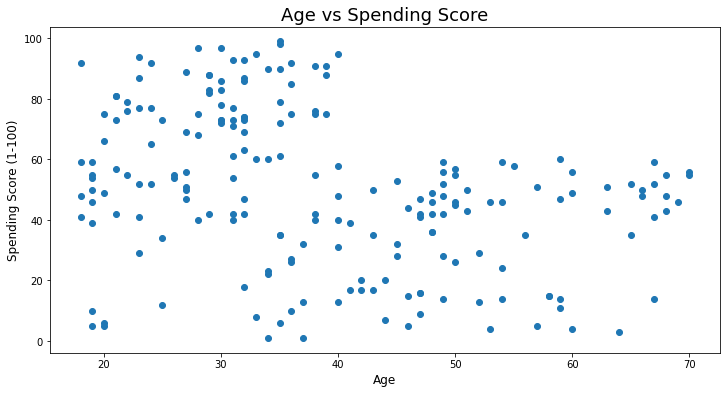

In [166]:
# correlation between age and spending score

plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Age vs Spending Score', fontsize=18)

Text(0.5, 1.0, 'Distribution of Spending Score by Age')

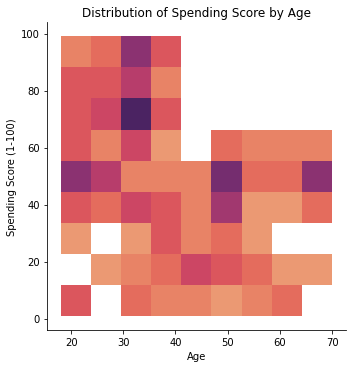

In [170]:
sns.displot(data= df ,y='Spending Score (1-100)',x='Age', cmap='flare')
plt.title('Distribution of Spending Score by Age')

Text(0.5, 1.0, 'Age vs Annual Income (k$)')

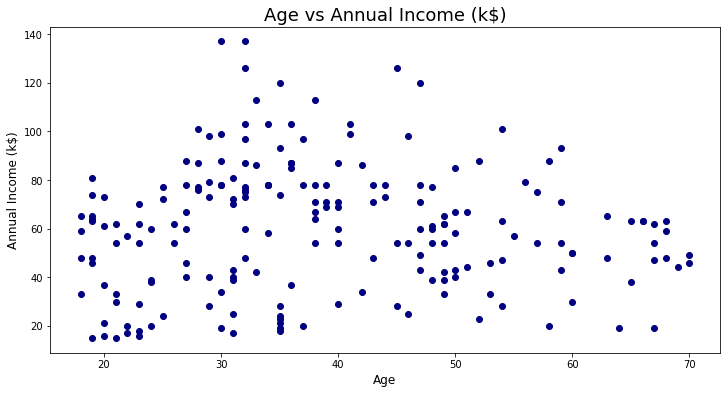

In [219]:
# correlation between age and annual income

plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], color='navy')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.title('Age vs Annual Income (k$)', fontsize=18)

In [3]:
# START CLUSTERING
# Univariate

from sklearn.cluster import KMeans
clustering1 = KMeans(n_clusters=3)

In [7]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [9]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [11]:
df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [12]:
# distance between centroids
clustering1.inertia_

23517.330930930933

In [13]:
inertia_scores = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df[['Annual Income (k$)']])
    inertia_scores.append(k_means.inertia_)

In [14]:
inertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5081.48466026727,
 3950.212698412699,
 2822.4996947496948,
 2268.886675579323,
 1779.892490842491]

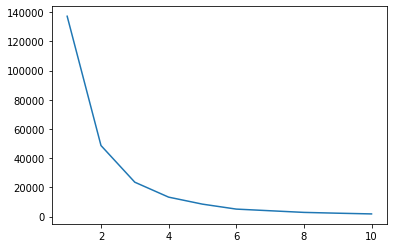

In [15]:
# elbow method
plt.plot(range(1,11),inertia_scores)

In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [17]:
# univariate
df.groupby('Income Cluster')['Annual Income (k$)'].mean()

Income Cluster
0    33.486486
1    67.088889
2    99.888889
Name: Annual Income (k$), dtype: float64

In [18]:
# bivariate
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [19]:
# Bivariate Clustering : using 2 variables

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,2


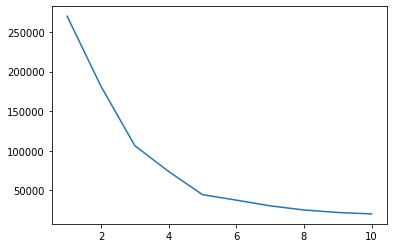

In [20]:
# plotting elbow
inertia_scores_2 = []
for i in range(1,11):
    k_means_2 = KMeans(n_clusters = i)
    k_means_2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores_2.append(k_means_2.inertia_)
plt.plot(range(1,11),inertia_scores_2)

In [21]:
# centroids
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

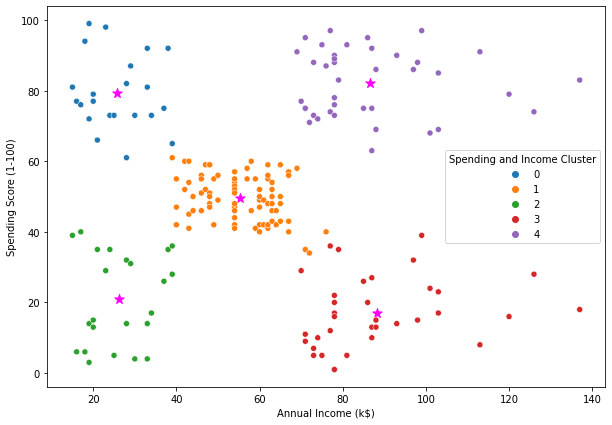

In [29]:
plt.figure(figsize = (10,7))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c='magenta',marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue='Spending and Income Cluster',palette='tab10')

In [23]:
# dig deeper to the cluster
pd.crosstab(df['Spending and Income Cluster'],df['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,13,9
1,48,33
2,14,9
3,16,19
4,21,18


In [24]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.608696,0.391304
3,0.457143,0.542857
4,0.538462,0.461538


In [25]:
pd.crosstab(df['Age'],df['Spending and Income Cluster'], normalize = 'index')

Spending and Income Cluster,0,1,2,3,4
Age,,,,,
18,0.250000,0.750000,0.000000,0.000000,0.000000
19,0.000000,0.625000,0.125000,0.250000,0.000000
20,0.400000,0.200000,0.200000,0.200000,0.000000
21,0.600000,0.400000,0.000000,0.000000,0.000000
22,0.666667,0.333333,0.000000,0.000000,0.000000
23,0.500000,0.333333,0.000000,0.166667,0.000000
24,0.750000,0.250000,0.000000,0.000000,0.000000
25,0.333333,0.333333,0.000000,0.333333,0.000000
26,0.000000,1.000000,0.000000,0.000000,0.000000


In [26]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,41.114286,88.200000,17.114286
4,32.692308,86.538462,82.128205
